In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

中文部分后面删掉

Test case后面删掉

### Test case: SIR model

In [53]:
# Initial population
S0 = 0.999 
I0 = 1 - S0
R0 = 0 
# A grid of time points (in days)
T = 200
t_range = np.linspace(0, T, T+1)
# Model parameters 
beta = 0.5 
gamma = 0.2

In [54]:
def sir(t, y):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I  - gamma * I
    dRdt = gamma * I
    dydt = np.array([dSdt, dIdt, dRdt])
    return dydt
sir_sol = integrate.solve_ivp(sir, [0,T], np.array([S0, I0, R0]), method='RK45', t_eval=t_range)

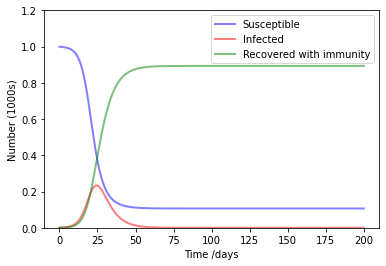

In [63]:
S, I, R = sir_sol.y[0,:], sir_sol.y[1,:], sir_sol.y[2,:]
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t_range, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t_range, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t_range, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
plt.show()

### Simulation

In [64]:
# Initial population
S1_ini = 0.999 ### 解释S1的含义，下同 ###
S2_ini = 0
S3_ini = 0
S4_ini = 0
I_ini = 1 - S1_ini
R1_ini, R2_ini, R3_ini, R4_ini = 0, 0, 0, 0 
y0 = np.array([S1_ini, S2_ini, S3_ini, S4_ini, I_ini, R1_ini, R2_ini, R3_ini, R4_ini])
# A grid of time points (in days)
T = 200
t_range = np.linspace(0, T, T+1)

需要自己调试
不需要赋值一样

In [93]:
# Model parameters 
beta1 = 0.6 ### 解释beta1的含义，下同 ###
beta2 = 0.6
beta3 = 0.1
beta4 = 0.1
gamma1, gamma2, gamma3, gamma4 = 0.4, 0.1, 0.1, 0.1
alpha = 0.1 ### beta和gammma常见，放前面；后面几个变量安音序排 ###
mu = 0.1
omega = 0.1
phi = 0.1
theta = 0.1

In [94]:
# The proposed model
def model(t, y):
    S1, S2, S3, S4, I, R1, R2, R3, R4 = y
    dS1dt = mu - theta*S1 - beta1*S1*I + phi*S2 
    dS2dt = + theta*S1 - beta2*S2*I - phi*S2 
    dS3dt = - theta*S3 - beta3*S3*I + phi*S4 + omega*R1 + omega*R3 
    dS4dt = + theta*S3 - beta4*S4*I - phi*S4 + omega*R2 + omega*R4 
    dIdt = (- alpha + beta1*S1 + beta2*S2 + beta3*S3 + beta4*S4 - gamma1 - gamma2 - gamma3 - gamma4)*I
    dR1dt = + gamma1*I - omega*R1 + phi*R2
    dR2dt = + gamma2*I - omega*R2 - phi*R2
    dR3dt = + gamma3*I - omega*R3 + phi*R4
    dR4dt = + gamma4*I - omega*R4 - phi*R4
    dydt = np.array([dS1dt, dS2dt, dS3dt, dS4dt, dIdt, dR1dt, dR2dt, dR3dt, dR4dt])
    return dydt

In [95]:
# Integrate the proposed ODE model over the time grid, t.
model_sol = integrate.solve_ivp(model, [0,T], y0, method='RK45', t_eval=t_range)
S1, S2, S3, S4 = model_sol.y[0,:], model_sol.y[1,:], model_sol.y[2,:], model_sol.y[3,:]
I = model_sol.y[4,:]
R1, R2, R3, R4 = model_sol.y[5,:], model_sol.y[6,:], model_sol.y[7,:], model_sol.y[8,:]

在某处解释一下：$N_0$ is the initial population, which is equal to 1.

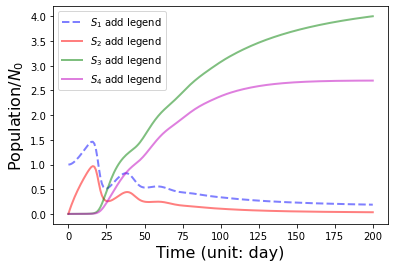

In [101]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t_range, S1, 'b--', alpha=0.5, lw=2, label='$S_1$ add legend')
ax.plot(t_range, S2, 'r', alpha=0.5, lw=2, label='$S_2$ add legend')
ax.plot(t_range, S3, 'g', alpha=0.5, lw=2, label='$S_3$ add legend')
ax.plot(t_range, S4, 'm', alpha=0.5, lw=2, label='$S_4$ add legend')
ax.set_xlabel('Time (unit: day)', fontsize=16)
ax.set_ylabel('Population/$N_0$', fontsize=16)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
plt.show()

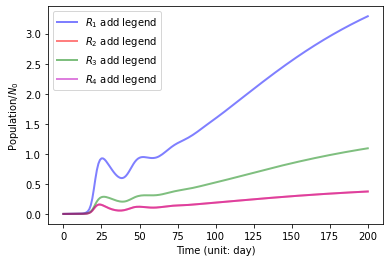

In [97]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t_range, R1, 'b', alpha=0.5, lw=2, label='$R_1$ add legend')
ax.plot(t_range, R2, 'r', alpha=0.5, lw=2, label='$R_2$ add legend')
ax.plot(t_range, R3, 'g', alpha=0.5, lw=2, label='$R_3$ add legend')
ax.plot(t_range, R4, 'm', alpha=0.5, lw=2, label='$R_4$ add legend')
ax.set_xlabel('Time (unit: day)')
ax.set_ylabel('Population/$N_0$')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
plt.show()

In [98]:
# Total population
N = model_sol.y.sum(axis=0)

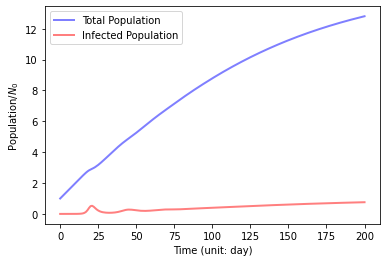

In [99]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t_range, N, 'b', alpha=0.5, lw=2, label='Total Population')
ax.plot(t_range, I, 'r', alpha=0.5, lw=2, label='Infected Population')
ax.set_xlabel('Time (unit: day)')
ax.set_ylabel('Population/$N_0$')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
plt.show()